# Trend of Sentiments for Vaccine related tweets between Feb.2020 to Feb.2021
- Lipsa Jena's Part

### Step 1 - Process Data
1. I have all the datas in the data folder, and we processed them by using differenet hashtags and directions.
- there are three major directions: covid, safety, vaccine and mine is vaccine.
- I will clean the vaccines to remove unwanted characters and perform sentiment analysis for the Vaccine data
- Then I will get the ratio of positive, neutral, and negative tweets so that I can plot in next steps

In [76]:
# define a function that can reprocess csv file and find all the 
# tweets having vaccine in it, and return a pandas' dataframe
import pandas as pd
import re
import os

def add_tweets_in_df(target_file_path):
    """
    @param: 
    target_file_path: string - usually a csv file
    target_dataframe - pandas.df
    
    @return:
    result_df - pandas data frame
    """
    df = pd.read_csv(target_file_path)
    return df

# this function will iterate files in each folder and write dataframes
# into new csv files, and return the dataframes for future uses
def write_csv(target_folder_name):
    """
    ptype: folder_naem - str
    rtype: month_list - list
    """
    month_list = {}
    for file in os.listdir(target_folder_name):
        if file[-4:] == '.csv':
            df = add_tweets_in_df(target_folder_name + file)
            month_list[file[:-4]] = df
            print(df.shape)
            df.to_csv("%s_%s.csv"%(file[:-4], "Vaccine"))
    return month_list

### Processing the all the tweets

In [77]:
vaccine_dictionary = write_csv('data/vaccine/')

(3158, 5)
(3533, 5)
(3240, 5)
(3202, 5)
(3613, 5)
(4007, 5)
(3619, 5)
(3618, 5)
(3147, 5)
(3245, 5)
(3580, 5)
(3488, 5)
(3335, 5)


In [78]:
# cleaning twitter specific data

def clean_tweets(row):
    row = row.lower()
    #remove urls
    row  = re.sub(r'http\S+', '', row)
    #remove mentions
    row = re.sub(r"(?<![@\w])@(\w{1,25})", '', row)
    #remove hashtags
    row = re.sub(r"(?<![#\w])#(\w{1,25})", '',row)
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row)
    #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    return row

round1 = lambda x: clean_tweets(x)

### we got pretty much a lot of tweets from each folder, so now lets get the ratios of sentiments for each month

In [79]:
# using vader to do sentiment analysis
import nltk
from nltk.corpus import opinion_lexicon
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def interpret_sentiment(score):
    if score <= -0.05:
        return 'Negative'
    elif score >= 0.05:
        return 'Positive'
    else: 
        return 'Neutral'

def vader_sentiment_analysis(content_list):
    """
    @parameters: 
    content_list - is a list of content
    @ return:
    nothing, but print out outcome
    """
    list_sentiment = []
    for word in content_list:
        scores = analyzer.polarity_scores(word)
        score = scores["compound"]
        list_sentiment.append(interpret_sentiment(score))
    return list_sentiment


import matplotlib.pyplot as plt
def get_ratios(target_list):
    """
    
    rtype: p_ratio - float, 
    """
    length = len(target_list)
    p, neu, neg = 0, 0, 0
    # now lets count the ratio of the positive out of all data
    for sentiment in target_list:
        if sentiment == "Positive":
            p += 1
        elif sentiment == "Neutral":
            neu += 1
        elif sentiment == "Negative":
            neg += 1

    p_ratio = round(p/length, 4)  #ratio for positive
    neu_ratio = round(neu/length, 4)   # ratio of neutral
    neg_ratio = round(neg/length, 4)   # ratio of negative
    print(p, neu, neg, length)
    
    return [p_ratio, neu_ratio, neg_ratio]

In [80]:
# put the info in a list in the chronological order
def in_order_lists(target_dict):
    """
    rtype: list - ord_df_l, dfs
    rtype: list - ord_month_l, list of strs
    """
    ord_df_l = [0] * len(target_dict.keys())
    ord_month = ["Feb 2020",
                "Mar 2020",
                "Apr 2020",
                "May 2020", 
                "Jun 2020", 
                "Jul 2020", 
                "Aug 2020",
                "Sep 2020",
                "Oct 2020",
                "Nov 2020",
                "Dec 2020",
                "Jan 2021",
                "Feb 2021"]

    for month in target_dict:
        if "feb_20" in month:
            ord_df_l[0] = target_dict[month]
        elif "march_20" in month:
            ord_df_l[1] = target_dict[month]
        elif "april_20" in month:
            ord_df_l[2] = target_dict[month]
        elif "may_20" in month:
            ord_df_l[3] = target_dict[month]
        elif "june_20" in month:
            ord_df_l[4] = target_dict[month]
        elif "july_20" in month:
            ord_df_l[5] = target_dict[month]
        elif "august_20" in month:
            ord_df_l[6] = target_dict[month]
        elif "sept_20" in month:
            ord_df_l[7] = target_dict[month]
        elif "oct_20" in month:
            ord_df_l[8] = target_dict[month]
        elif "nov_20" in month:
            ord_df_l[9] = target_dict[month]
        elif "dec_20" in month:
            ord_df_l[10] = target_dict[month]
        elif "jan_21" in month:
            ord_df_l[11] = target_dict[month]
        elif "feb_21" in month:
            ord_df_l[12] = target_dict[month]
            
    return ord_df_l, ord_month

In [81]:
# print(in_order_lists(covid_dictionary))

## Step 2: Visualization

In [82]:
def draw_in_one_plot(target_list_of_ys, target_list_of_xs, title):
    p_list, neu_list, neg_list = [], [], []
    annotating_list = [p_list, neu_list, neg_list]
    
    for i in range(len(list_of_df_of_months)):
        y = get_ratios(vader_sentiment_analysis(target_list_of_ys[i]["text"].tolist()))
        x = [list_of_month[i], list_of_month[i], list_of_month[i]]
        
        p_list.append(y[0])
        neu_list.append(y[1])
        neg_list.append(y[2])
        
    plt.figure(figsize=(13,7))
    plt.scatter(target_list_of_xs, neu_list, color = "gray")
    plt.scatter(target_list_of_xs, p_list, color="green")
    plt.scatter(target_list_of_xs, neg_list, color = "red")

    ## anotating the values
    for lists in annotating_list:
        y = lists
        x = target_list_of_xs
        for i, txt in enumerate(y):
                plt.annotate(txt, (x[i], y[i]),xytext=(x[i], y[i] + 0.01),fontsize=10)
            
    plt.plot(target_list_of_xs, p_list, color="green", label = "Positive")
    plt.plot(target_list_of_xs, neu_list, color = "gray", label = "Neutral")
    plt.plot(target_list_of_xs, neg_list, color = "red", label = "Negative")
    
    plt.xlabel("Months")
    plt.ylabel("Ratios")
    plt.title("The trends from Feb 2020 to Feb 2021 on %s" % title)
    plt.axvline(x = 10.7, color = 'b', alpha=0.8, linestyle = ":", label="Inaugaration - Jan.20.2021")
    plt.axvline(x = 6, color = 'g', alpha=0.8, linestyle = "--", label="Phase I/II vaccine results")
    plt.axvline(x = 8.1, color = 'r', alpha=0.8, linestyle = "--", label="Phase III vaccine results")
    plt.legend(bbox_to_anchor=(1, 1))
    # adding an line indicates the inaugarate

900 1435 1283 3618
1268 1304 1435 4007
1050 1125 972 3147
1023 1153 982 3158
994 1253 993 3240
977 1302 923 3202
1092 1246 997 3335
1278 1145 1110 3533
1227 1160 1226 3613
1211 1510 859 3580
1181 1347 1091 3619
1112 1348 1028 3488
1052 1302 891 3245


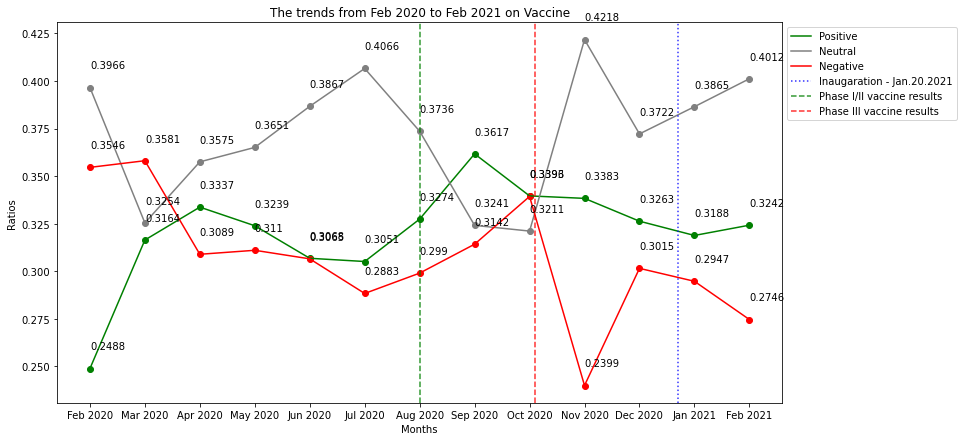

In [83]:
# see trend in vaccine folders lipsa
list_of_df_of_months, list_of_month = in_order_lists(vaccine_dictionary)
draw_in_one_plot(list_of_df_of_months, list_of_month, "Vaccine")

# Step 3: Analyze Data

**Summary:**

- This is a plot of Vaccine related sentiment analysis over 13 months from Feb 2020 to Feb 2021. 

- The red line shows negative sentiment ratio, grey is neutral and green is positive. The three highlighted lines are Vaccine phase I/II outcome day, Vaccine phase III ouctome day and President Biden inaugural day.

- As you can see, the trend of negative sentiment towards vaccine has fallen down over all, also a trend of growing positive sentiment could be seen.

- When clinical stage result came out, a upward positive sentiment could be noticed, but a slight growth in negative sentiment is also seen.

- When Phase three results came out during early Nov 2020 which is also happens to be the election week, a huge drop in negative sentiment is noticed.

**Compare with hypothesis:** One of our research question is to see if there is any trend before and after important days in th last year. For example: in case of Vaccine - it makes sense to check around Vaccine phase outcomes day. 

- As expected, when the vaccine companies like pfizer, moderna release their phase 3 result which was around 95% accurate, the negative sentiment dropped gradually in Nov 2020. The election also played an important role in my opinion.

**Future analysis:** As more and more people are getting vaccinated every day - around 4.6 million people. In my opinion, the negative sentiment should fall and the neutral sentiments should increase.

